### Degree 2 Regression

/opt/anaconda3/envs/jupyterlab-debugger/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


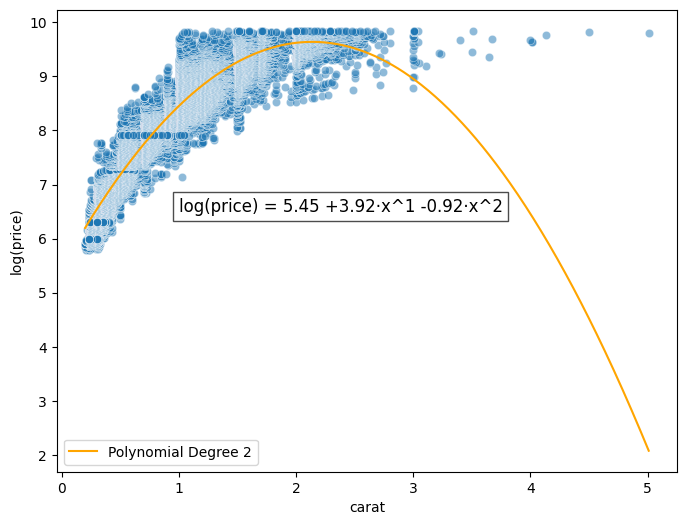

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load and prepare data
df = sns.load_dataset('diamonds')
df['log_price'] = np.log(df['price'])
df = df[['carat', 'log_price']].dropna()

# Features and target
X = df[['carat']]
y = df['log_price']

# Create polynomial regression pipeline (degree = 2)
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Predict for a smooth line
x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plot the data and curve
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='log_price', data=df, alpha=0.5)
plt.plot(x_range, y_pred, color='orange', label=f'Polynomial Degree {degree}')

# Retrieve coefficients to construct equation
linreg = model.named_steps['linearregression']
poly = model.named_steps['polynomialfeatures']
coefs = linreg.coef_
intercept = linreg.intercept_

# Format the equation string
terms = [f"{coefs[i]:+.2f}·x^{i}" for i in range(1, len(coefs))]
equation = "log(price) = " + f"{intercept:.2f} " + " ".join(terms)

# Add equation to plot
plt.text(1, 6.5, equation, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.xlabel('carat')
plt.ylabel('log(price)')
plt.legend()
plt.show()


### Degree 3 Regression

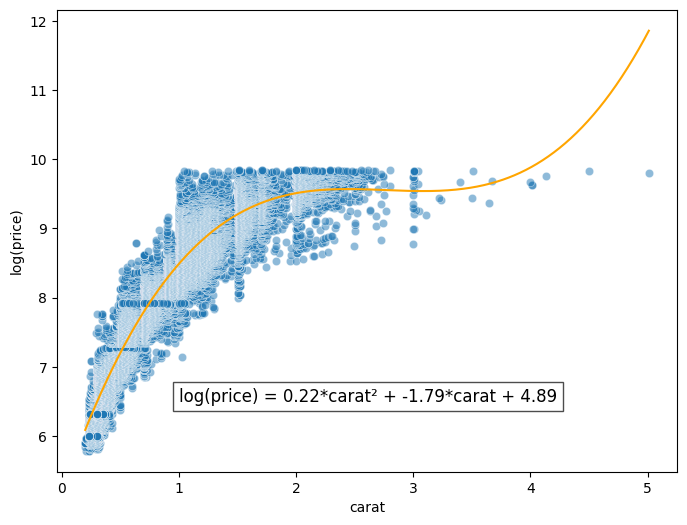

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = sns.load_dataset('diamonds')
df['log_price'] = np.log(df['price'])
df = df[['carat', 'log_price']].dropna()

# Fit a 2nd-degree polynomial (quadratic)
coeffs = np.polyfit(df['carat'], df['log_price'], deg=3)
poly_eq = np.poly1d(coeffs)

# Generate x values and predictions
x_vals = np.linspace(df['carat'].min(), df['carat'].max(), 500)
y_vals = poly_eq(x_vals)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='log_price', data=df, alpha=0.5)
plt.plot(x_vals, y_vals, color='orange')

# Annotate with the polynomial equation
eq_text = f"log(price) = {coeffs[0]:.2f}*carat² + {coeffs[1]:.2f}*carat + {coeffs[2]:.2f}"
plt.text(1, 6.5, eq_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel('carat')
plt.ylabel('log(price)')
plt.show()
